In [3]:
# Add root dir to sys.path
import sys
from pathlib import Path

# print(Path.cwd().parent)
sys.path.append(str(Path.cwd().parent))  # or adjust as needed

import numpy as np
import pandas as pd


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from src.core.backprop import BackProp
from src.core.layers import NeuNet
from src.core.feed_forward import FeedForward
from src.core.learner import Learner
from src.utils.loss_functions import binary_cross_entropy, mean_squared_error
from src.utils.data_randomize import df_random

# resolve paths
# curr_script_path = Path.cwd()
curr_folder_path = Path.cwd()
root_folder_path = curr_folder_path.parent
# root_folder_path = curr_folder_path.parent
data_folder = root_folder_path / "data/data_to_test"

rand_df = df_random(pd.read_csv(str(data_folder)+"/binary_classification_data.csv"))
# rand_df = pd.read_csv(str(data_folder)+"/binary_classification_data.csv")

In [5]:
rand_df

,Unnamed: 0,x_0,x_1,y
0,0,0.882026,0.941575,0.0
1,1,0.200079,-0.673880,0.0
2,2,0.489369,-0.635242,0.0
3,3,1.120447,0.484698,0.0
4,4,0.933779,-0.586562,0.0
...,...,...,...,...
195,195,2.568446,1.619254,1.0
196,196,2.048862,2.428962,1.0
197,197,2.291477,2.570551,1.0
198,198,1.800275,2.733289,1.0


In [6]:
tr_X = rand_df.iloc[:, 1:3]
tr_X = np.array(tr_X)
tr_y = rand_df.iloc[:, -1]
tr_y = np.array(tr_y)
tr_y = tr_y.reshape(tr_y.shape[0], 1)

In [8]:


net = NeuNet(tr_X, tr_y)
net.input_layer()
net.add_hidden_layer(1, "sigmoid")
net.output_layer(1, "sigmoid")
net.initialize_weights()

ff = FeedForward(net)
bp = BackProp(forward_pass=ff, learning_rate=0.001, loss_function="binary_cross_entropy")
epoch = 200
tr = Learner(backprop=bp, epoch=epoch)
loss = tr.train()


INFO:root:Loss - 0.7149058864973808
INFO:root:Epoch: 0 - Average Loss: 0.7149058864973808
INFO:root:Loss - 0.7091040563240101
INFO:root:Epoch: 1 - Average Loss: 0.7091040563240101
INFO:root:Loss - 0.7103853681049306
INFO:root:Epoch: 2 - Average Loss: 0.7103853681049306
INFO:root:Loss - 0.7170913421058567
INFO:root:Epoch: 3 - Average Loss: 0.7170913421058567
INFO:root:Loss - 0.7278666341373554
INFO:root:Epoch: 4 - Average Loss: 0.7278666341373554
INFO:root:Loss - 0.7416340883221711
INFO:root:Epoch: 5 - Average Loss: 0.7416340883221711
INFO:root:Loss - 0.7575545331625319
INFO:root:Epoch: 6 - Average Loss: 0.7575545331625319
INFO:root:Loss - 0.7749831644142439
INFO:root:Epoch: 7 - Average Loss: 0.7749831644142439
INFO:root:Loss - 0.7934292887267643
INFO:root:Epoch: 8 - Average Loss: 0.7934292887267643
INFO:root:Loss - 0.8125221078872197
INFO:root:Epoch: 9 - Average Loss: 0.8125221078872197
INFO:root:Loss - 0.8319829904981498
INFO:root:Epoch: 10 - Average Loss: 0.8319829904981498
INFO:root

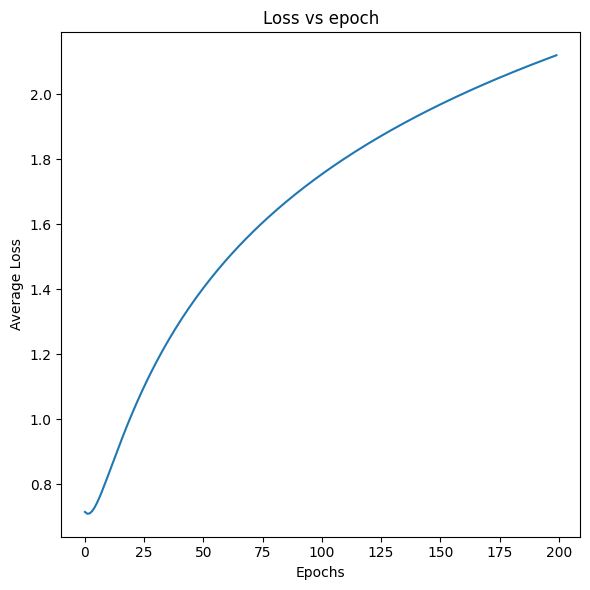

In [9]:
tr.plot_loss()
# list(range(10))